In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.cm as cm
import random
import matplotlib.patches as patches
from matplotlib.collections import LineCollection



In [0]:
workingDir=os.getcwd()
#workingDir=""
experimentDir="/../data/Fig_2/"
workingDir=workingDir+experimentDir
#os.chdir(workingDir)

list_populations_names=["pBGT",
                        "HT-1505-1","HT-1505-2","HT-1505-3",
                        "HT-A25-1","HT-A25-2","HT-A25-3",
                        "HT-C12-1","HT-C12-2","HT-C12-3",
                        "HT-LB",
                        "pBRT"];
list_populations_files=os.listdir(workingDir)
list_populations_files.sort()
list_populations_files

['G1.txt',
 'HT-0_chl-15_caz-05_rep-1.txt',
 'HT-0_chl-15_caz-05_rep-2.txt',
 'HT-0_chl-15_caz-05_rep-3.txt',
 'HT_1_A25_REP-1.txt',
 'HT_1_A25_REP-2.txt',
 'HT_1_A25_REP-3.txt',
 'HT_1_C125_REP-1.txt',
 'HT_1_C125_REP-2.txt',
 'HT_1_C125_REP-3.txt',
 'HT_1_LB.txt',
 'R12.txt']

In [0]:
pwd()

'/home/charly/gdrive/gdrive-esb/pHT/ms/code'

In [0]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(phi, rho)


In [0]:
dfs=[]

for pop_name,file in zip(list_populations_names,list_populations_files):
    file_name=workingDir+file
    print(pop_name,file_name)
    this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        
    #this_ratio=this_gfp/this_rfp
        
        
    this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP','Intensity_MC_Ch04':'DsRed',}, inplace=True)
        
#    this_df=pd.DataFrame({"pop":pop_names,"ids":pop_id,"GFP":pop_gfp,"DsRed":pop_rfp,"ratio":pop_ratio,"phis":pop_phi,"rhos":pop_rho})
    
    ids=list(this_df["ids"])
    this_size=len(ids)
    popname_list=[pop_name]*this_size
        
    gfps=list(this_df["GFP"])
    rfps=list(this_df["DsRed"])
    
    pop_ratio=[]
    pop_phi=[]
    pop_rho=[]
    for g,r in zip(gfps,rfps):
        pop_ratio.append(g/r)
        phi,rho=cart2pol(g,r)
        pop_phi.append(phi)
        pop_rho.append(rho)
    df_temp=pd.DataFrame({"ids":ids,"pop":popname_list,"ratio":pop_ratio,"phis":pop_phi,"rhos":pop_rho})
        
    df=pd.merge(this_df,df_temp, on=["ids"])
    
    dfs.append(df)

df_pops_all=pd.concat(dfs)
df_pops_all.describe()

pBGT /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/G1.txt
HT-1505-1 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT-0_chl-15_caz-05_rep-1.txt
HT-1505-2 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT-0_chl-15_caz-05_rep-2.txt
HT-1505-3 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT-0_chl-15_caz-05_rep-3.txt
HT-A25-1 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_A25_REP-1.txt
HT-A25-2 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_A25_REP-2.txt
HT-A25-3 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_A25_REP-3.txt
HT-C12-1 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_C125_REP-1.txt
HT-C12-2 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_C125_REP-2.txt
HT-C12-3 /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_C125_REP-3.txt
HT-LB /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data/Fig_2/HT_1_LB.txt
pBRT /home/charly/gdrive/gdrive-esb/pHT/ms/code/../data

,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,ratio,phis,rhos
count,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000
mean,9999.500000,21.563792,70.574004,0.622303,12644.548239,3148.341226,4837.073859,6.191044,0.375467,13394.971365
std,5773.514713,6.735433,2.893548,0.113661,10612.544959,2691.736960,3145.890310,9.289756,0.396827,10499.662520
min,0.000000,0.000000,0.000000,0.000000,-463.500000,-150.034483,-1085.390625,-1730.794118,-3.111167,10.066187
25%,4999.750000,16.777778,68.894171,0.544317,6102.030626,1550.816964,2797.699821,2.624683,0.179284,6598.848999
50%,9999.500000,20.111111,70.725958,0.619650,10324.701786,2471.375237,4363.226852,3.929604,0.249028,10770.551198
75%,14999.250000,24.555556,72.679365,0.696181,16505.668324,3878.890625,6276.120833,5.511753,0.363644,17048.663591
max,19999.000000,155.444444,83.796635,1.000000,175709.666667,76143.820513,65550.340000,1338.434174,3.083171,175812.853551


In [0]:
def plot_Raw_flourescence(data1,data2,title,name1,name2,lg,lr):
    fig,ax= plt.subplots( figsize=(10,5))
    
    xm=np.mean(data1)
    ym=np.mean(data2)
    
    ax.scatter(data1,data2,s=5,alpha=.1)
    ax.scatter(xm,ym,c='r')
    #ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim(left=0)
    if(lg):
        ax.set_xlim(right=lg)
    ax.set_ylim(bottom=0)
    
    if(lr):
        ax.set_ylim(top=lr)
    
    ax.set_title(title, va='bottom')
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)

    lregGFP=linregress(data1,data2)
    x_vals = np.array(ax.get_xlim())
    y_vals = lregGFP.intercept + lregGFP.slope * x_vals
    ax.plot(x_vals, y_vals, '--g')

    return plt

def plot_polar_fluorescence(datap1,datap2,phimax,phimin,phimean,rhomean,rhomax,title):
    fig= plt.figure( figsize=(10,5))
    ax=fig.add_subplot(111,projection='polar') 
    ax.plot([0,phimin],[0,rhomax])
    ax.plot([0,phimax],[0,rhomax])
    ax.scatter(datap1, datap2,s=5,alpha=.1)
    ax.scatter(phimean,rhomean,c='r',zorder=3)
    ax.set_rmax(rhomax)

   # ax.grid(True)

    ax.set_title("Polar plot of fluorescence %s"%(title), va='bottom')
    return plt


def plot_polar_fluorescence_01(datap1,datap2,phimax,phimin,phimean,rhomean,rhomax,title):
    
    fig= plt.figure( figsize=(10,5))
    ax=fig.add_subplot(111,projection='polar') 
    #ax.plot([0,phimin],[0,rhomax])
    #ax.plot([0,phimax],[0,rhomax])
    ax.scatter(datap1, datap2,s=10,alpha=.1)
    ax.scatter(phimean,rhomean,c='r',zorder=3)
    lphimean=np.mean(datap1)
    lrhomean=np.mean(datap2)
    ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
    ax.set_rmax(rhomax)
    
   # ax.grid(True)

    ax.set_title("Polar plot of fluorescence %s %s"%(r'$[0,\pi]$',title), va='bottom')
    return plt


def plot_phi_hist(lphis,prange,pop):

    fig,ax= plt.subplots( figsize=(5,5))
    #phiden=st.gaussian_kde(lphis)
    #ax.plot(prange,phiden(prange),c='g')
    n,bins,patches=plt.hist(lphis,bins=prange)#,density='true')
    #plt.yscale("log")
    #print(n.std())
    #print(lphis.std())
    #plt.ylim(ymax=lymax)
    ax.set_title("Histogram %s "%(pop), va='bottom')
    ax.set_xlabel("Relative intensity (phis)")
    ax.set_ylabel("Count")
    return plt


def plot_this_pop(this_df,pop,prange,phimax,phimin,phimean,rhomean,rhomax,phimaxN,phiminN,phimeanN,rhomaxN,rhomeanN):
    fig= plt.figure( figsize=(30, 5))
    
    ax1=fig.add_subplot(161) 
    gfps=this_df["GFP_N"]
    rfps=this_df["DsRed_N"]
    
    xm=np.mean(gfps)
    ym=np.mean(rfps)
    
    ax1.scatter(gfps,rfps,s=5,alpha=.3)
    ax1.scatter(xm,ym,c='r')
    #ax.set_aspect('equal')
    ax1.grid(True)
    ax1.set_xlim(left=0,right=1)
#     if(lg):
#         ax1.set_xlim(right=lg)
    ax1.set_ylim(bottom=0,top=1)
    
#     if(lr):
#         ax1.set_ylim(top=lr)
    
    ax1.set_title(pop, va='bottom')
    ax1.set_xlabel("GFP")
    ax1.set_ylabel("DsRed")

    lregGFP=linregress(gfps,rfps)
    x_vals = np.array(ax1.get_xlim())
    y_vals = lregGFP.intercept + lregGFP.slope * x_vals
    ax1.plot(x_vals, y_vals, '--g')

    
    ax2=fig.add_subplot(162,projection='polar') 
    
    phis=this_df['phis_rot']
    rhos=this_df['rhos']
    
    ax2.plot([0,phimin],[0,rhomax])
    ax2.plot([0,phimax],[0,rhomax])
    ax2.scatter(phis, rhos,s=5,alpha=.1)
    ax2.scatter(phimean,rhomean,c='r',zorder=3)
    ax2.set_rmax(rhomax)
   # ax2.grid(True)
    ax2.set_title("Polar plot of fluorescence %s"%(pop), va='bottom')
    

    ax3=fig.add_subplot(163,projection='polar') 
    phis01=this_df['phis_01']
    rhos01=this_df['rhos_01']
    
    #ax.plot([0,phimin],[0,rhomax])
    #ax.plot([0,phimax],[0,rhomax])
    ax3.scatter(phis01, rhos01,s=10,alpha=.1)
    ax3.scatter(phimean,rhomean/rhomax,c='r',zorder=3)
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    ax3.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
    ax3.set_rmax(1)
    # ax.grid(True)
    ax3.set_title("Polar plot of fluorescence %s %s"%(r'$[0,\pi]$',pop), va='bottom')
    


    ax4=fig.add_subplot(164) 
    
    n,bins,patches=plt.hist(phis,bins=prange)#,density='true')
    ax4.set_title("Histogram %s "%(pop), va='bottom')
    ax4.set_xlabel("Relative intensity (phis)")
    ax4.set_ylabel("Count")
    
    
    ax5=fig.add_subplot(165,projection='polar') 
    
    phis=this_df['phis_Nrot']
    rhos=this_df['rhos_N']
    
    ax5.plot([0,phiminN],[0,rhomaxN])
    ax5.plot([0,phimaxN],[0,rhomaxN])
    ax5.scatter(phis, rhos,s=5,alpha=.1)
    ax5.scatter(phimeanN,rhomeanN,c='r',zorder=3)
    ax5.set_rmax(rhomaxN)
   # ax2.grid(True)
    ax5.set_title("Polar plot of Norm fluorescence %s"%(pop), va='bottom')
    

    ax6=fig.add_subplot(166,projection='polar') 
    phis01=this_df['phis_N01']
    rhos01=this_df['rhos_N01']
    
    #ax.plot([0,phimin],[0,rhomax])
    #ax.plot([0,phimax],[0,rhomax])
    ax6.scatter(phis01, rhos01,s=10,alpha=.1)
    ax6.scatter(phimeanN,rhomeanN/rhomaxN,c='r',zorder=3)
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    ax6.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
    ax6.set_rmax(1)
    # ax.grid(True)
    ax6.set_title("Polar plot of Norm fluorescence %s %s"%(r'$[0,\pi]$',pop), va='bottom')
    
    
    
    return plt

## Limits for max GFP and max DsRed
# Manually!

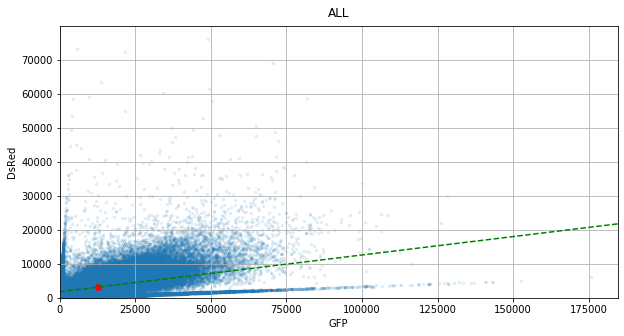

In [0]:
plt=plot_Raw_flourescence(df_pops_all["GFP"],df_pops_all["DsRed"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

 ## Discriminating data using adquisition parameters

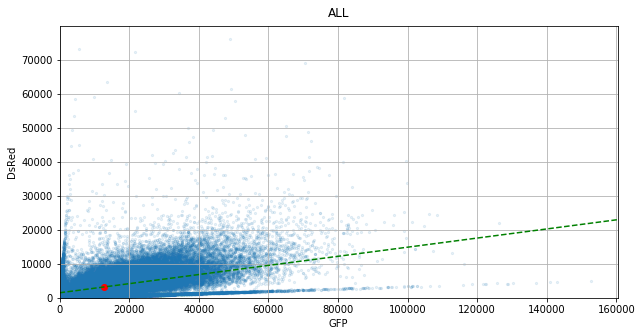

In [0]:
df_pops=df_pops_all[(df_pops_all["Aspect Ratio_M01"]>.3)&(df_pops_all["Aspect Ratio_M01"]<.8)&
                 (df_pops_all["Gradient RMS_M01_Ch01"]>65)&(df_pops_all["Gradient RMS_M01_Ch01"]<85)
                ]
# #df_pops=df_pops_all.copy()
# sub_df=df_pops[df_pops["pop"]=="pBGT"]
# sub_df=sub_df[sub_df["DsRed"]<sub_df.DsRed.mean()+3*sub_df.DsRed.std()]
# sub_df=sub_df[sub_df["GFP"]<sub_df.GFP.mean()+3*sub_df.GFP.std()]
# #print(sub_df.describe())
# plt=plot_Raw_flourescence(sub_df["GFP"],sub_df["DsRed"],"pBGT","GFP","DsRed",0,0)
# plt.show()
# plt.close()
# sub_df=df_pops[df_pops["pop"]=="pBRT"]
# sub_df=sub_df[sub_df["DsRed"]<sub_df.DsRed.mean()+3*sub_df.DsRed.std()]
# sub_df=sub_df[sub_df["GFP"]<sub_df.GFP.mean()+3*sub_df.GFP.std()]
# #print(sub_df.describe())0
# plt=plot_Raw_flourescence(sub_df["GFP"],sub_df["DsRed"],"pBRT","GFP","DsRed",0,0)
# plt.show()
# plt.close()



plt=plot_Raw_flourescence(df_pops["GFP"],df_pops["DsRed"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

In [0]:
gfp_limit=70000
rfp_limit=20000



In [0]:
df_pops_lim=df_pops[(df_pops["GFP"]<gfp_limit)&(df_pops["DsRed"]<rfp_limit)].copy()
gfpsN=df_pops_lim["GFP"]/gfp_limit
rfpsN=df_pops_lim["DsRed"]/rfp_limit
pops=df_pops_lim['pop']
ids=df_pops_lim['ids']


phis=[]
rhos=[]
for this_gfp,this_rfp in zip(gfpsN,rfpsN):
    this_phi,this_rho=cart2pol(this_gfp,this_rfp)
    phis.append(this_phi)
    rhos.append(this_rho)
    


tempDF=pd.DataFrame({"pop":pops,"ids":ids,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phis_N":phis,"rhos_N":rhos})

df_pops_lim=pd.merge(df_pops_lim,tempDF,on=['pop','ids'])
df_pops_lim.tail()

,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,pop,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N
213354,19988,35.666667,73.764972,0.681980,682.471154,7626.067308,6757.096154,pBRT,0.089492,1.481542,7656.544224,0.009750,0.381303,1.545233,0.381428
213355,19993,15.222222,73.614431,0.551380,256.307692,3409.533654,4403.062500,pBRT,0.075174,1.495764,3419.153897,0.003662,0.170477,1.549321,0.170516
213356,19994,17.666667,71.149294,0.643891,194.522727,1888.954545,3360.454545,pBRT,0.102979,1.468179,1898.944013,0.002779,0.094448,1.541382,0.094489
213357,19995,20.777778,66.785125,0.704495,238.570000,2081.405000,4486.020000,pBRT,0.114620,1.456675,2095.032797,0.003408,0.104070,1.538060,0.104126
213358,19998,27.555556,69.738051,0.636833,215.198276,3251.853448,3959.982759,pBRT,0.066177,1.504716,3258.966270,0.003074,0.162593,1.551891,0.162622


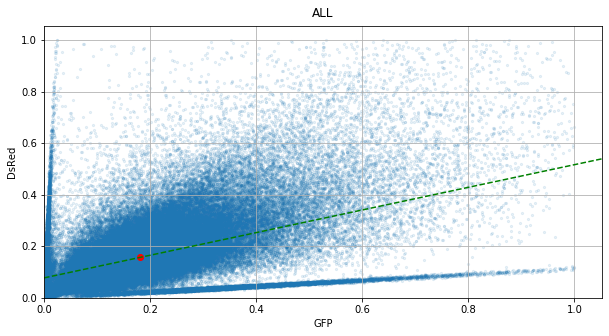

In [0]:
plt=plot_Raw_flourescence(df_pops_lim["GFP_N"],df_pops_lim["DsRed_N"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

10.420622123159063 71381.63895449879
13312.20559680162 9519.256058907027 51389.22983242973


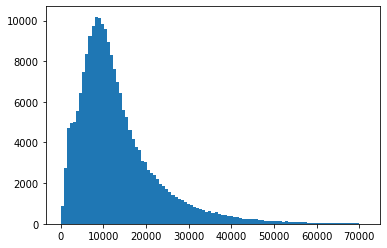

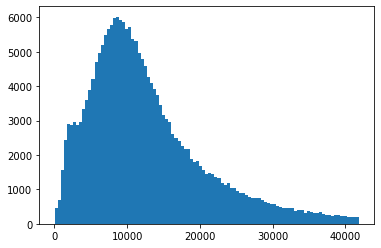

0.0002544739526167625 1.3786815732161668
0.2522101446160419 0.16454460874556934 0.74584397085275


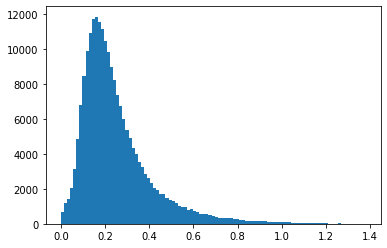

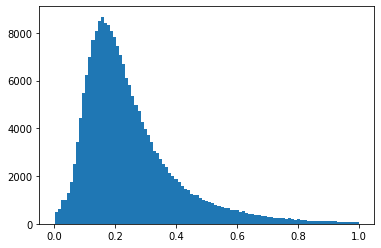

In [0]:
lrhos=df_pops_lim["rhos"]
rrange=np.linspace(lrhos.min(),lrhos.max(),100)
print(lrhos.min(),lrhos.max())
print(lrhos.mean(),lrhos.std(),lrhos.mean()+4*lrhos.std())
n,bins,patchesn=plt.hist(lrhos,bins=rrange)#,density='true')
#print(n)
plt.show()
rrange=np.linspace(lrhos.min(),lrhos.mean()+3*lrhos.std(),100)
n,bins,patchesn=plt.hist(lrhos,bins=rrange)#,density='true')
#print(n)
plt.show()
lrhos=df_pops_lim["rhos_N"]
rrange=np.linspace(lrhos.min(),lrhos.max(),100)
print(lrhos.min(),lrhos.max())
print(lrhos.mean(),lrhos.std(),lrhos.mean()+3*lrhos.std())
n,bins,patchesn=plt.hist(lrhos,bins=rrange)#,density='true')
#print(n)
plt.show()
rrange=np.linspace(lrhos.min(),lrhos.mean()+5*lrhos.std(),100)
rrange=np.linspace(lrhos.min(),1,100)
n,bins,patchesn=plt.hist(lrhos,bins=rrange)#,density='true')
#plt.yscale('log')
#print(n)
plt.show()

In [0]:
meanPhi=df_pops_lim.phis.mean()
rot_theta=np.pi/2- meanPhi
meanPhi_rot=meanPhi+rot_theta
maxPhi_rot=df_pops_lim.phis.max()+rot_theta
minPhi_rot=df_pops_lim.phis.min()+rot_theta

meanRho=df_pops_lim.rhos.mean()
maxRho=df_pops_lim.rhos.max()
maxRho99=df_pops_lim.rhos.mean()+3*df_pops_lim.rhos.std()
print("Rho:",meanRho,maxRho,maxRho99)

# meanPhi=df_pops_lim.relativeIntensity.mean()
# rot_theta=np.pi/2- meanPhi
# meanPhi_rot=meanPhi+rot_theta

print("All:    \t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta)

df_pops_limR=df_pops_lim[df_pops_lim["pop"]=="pBRT"].copy()
df_pops_limR=df_pops_limR[(df_pops_limR["phis"]>df_pops_limR.phis.mean()-2*df_pops_limR.phis.std())
                         &(df_pops_limR["phis"]<df_pops_limR.phis.mean()+2*df_pops_limR.phis.std())
                         ]
df_pops_limG=df_pops_lim[df_pops_lim["pop"]=="pBGT"].copy()
df_pops_limG=df_pops_limG[(df_pops_limG["phis"]>df_pops_limG.phis.mean()-2*df_pops_limG.phis.std())
                         &(df_pops_limG["phis"]<df_pops_limG.phis.mean()+2*df_pops_limG.phis.std())
                         ]

minPhi=df_pops_limG.phis.min()
maxPhi=df_pops_limR.phis.max()
meanPhi=(maxPhi-minPhi)/2
rot_theta=np.pi/2- meanPhi
meanPhi_rot=meanPhi+rot_theta
minPhi_rot=minPhi+rot_theta
maxPhi_rot=maxPhi+rot_theta


print("Homos extreme:\t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
a=((minPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
b=((meanPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
c=((maxPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
print(a,b,c)
print()

minPhi=df_pops_limG.phis.mean()
maxPhi=df_pops_limR.phis.mean()
meanPhi=(maxPhi-minPhi)/2
rot_theta=np.pi/2- meanPhi
meanPhi_rot=meanPhi+rot_theta
minPhi_rot=minPhi+rot_theta
maxPhi_rot=maxPhi+rot_theta

print("Homos mean:\t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
a=((minPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
b=((meanPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
c=((maxPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
print(a,b,c)
print()



minPhi=df_pops_limG.phis.mean()#-(df_pops_limG.phis.std()*2)
maxPhi=df_pops_limR.phis.mean()#+(df_pops_limR.phis.std()*2)
meanPhi=(maxPhi-minPhi)/2
meanPhi=df_pops_lim[df_pops_lim["pop"].str.contains("HT-1505")].phis.mean()
rot_theta=np.pi/2- meanPhi
meanPhi_rot=meanPhi+rot_theta
minPhi_rot=minPhi+rot_theta
maxPhi_rot=maxPhi+rot_theta


print("Homos mean+std:\t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
a=((minPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
b=((meanPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
c=((maxPhi_rot-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
print(a,b,c)
print()



minPhi_N=df_pops_limG.phis_N.mean()-(df_pops_limG.phis_N.std()*2)
maxPhi_N=df_pops_limR.phis_N.mean()+(df_pops_limR.phis_N.std()*2)
meanPhi_N=(maxPhi_N-minPhi_N)/2
meanPhi_N=df_pops_lim[df_pops_lim["pop"].str.contains("HT-1505")].phis_N.mean()
rot_theta_N=np.pi/2- meanPhi_N


minPhi_N=df_pops_limG.phis_N.mean()#-(df_pops_limG.phis_N.std()*2)
maxPhi_N=df_pops_limR.phis_N.mean()#+(df_pops_limR.phis_N.std()*2)


meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N

print("HomsN mean+std:\t",minPhi_Nrot,maxPhi_Nrot,meanPhi_Nrot,rot_theta_N,minPhi_N,maxPhi_N)
a=((minPhi_Nrot-minPhi_Nrot)/(maxPhi_Nrot-minPhi_Nrot))*np.pi
b=((meanPhi_Nrot-minPhi_Nrot)/(maxPhi_Nrot-minPhi_Nrot))*np.pi
c=((maxPhi_Nrot-minPhi_Nrot)/(maxPhi_Nrot-minPhi_Nrot))*np.pi
print(a,b,c,rot_theta_N,meanPhi_N)
print(np.pi/2)


meanRho_N=df_pops_lim.rhos_N.mean()
maxRho_N=df_pops_lim.rhos_N.max()
print("RhoN:",meanRho_N,maxRho_N)



phis_rot=df_pops_lim['phis']+rot_theta
rhos=df_pops_lim['rhos']
phis01=[]

for this_phi in phis_rot:
    phi01=((this_phi-minPhi_rot)/(maxPhi_rot-minPhi_rot))*np.pi
    if(this_phi<meanPhi_rot):
        phi01=((this_phi-minPhi_rot)/(meanPhi_rot-minPhi_rot))*np.pi/2
       # phi01=0
    else:
        phi01=((this_phi-meanPhi_rot)/(maxPhi_rot-meanPhi_rot)+1)*np.pi/2
#     if(phi01==np.pi):
#         print("*",this_phi)
#     if(phi01==0):
#         print("*",this_phi)

    phis01.append(phi01)

    

rhos01=rhos/maxRho99 

phis_Nrot=df_pops_lim['phis_N']+rot_theta_N
rhosN=df_pops_lim['rhos_N']

maxRhoN99=rhosN.mean()+3*rhosN.std()
rhosN01=rhosN/maxRhoN99

phisN01=[]

for this_phi in phis_Nrot:
    phi01=((this_phi-minPhi_Nrot)/(maxPhi_Nrot-minPhi_Nrot))*np.pi
    if(this_phi<meanPhi_Nrot):
        phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
       # phi01=0
    else:
        phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
#     if(phi01==np.pi):
#         print("*",this_phi)
#     if(phi01==0):
#         print("*",this_phi)

    
    phisN01.append(phi01)




pops=df_pops_lim['pop']
ids=df_pops_lim['ids']

tempDF=pd.DataFrame({"pop":pops,"ids":ids,"phis_rot":phis_rot,"phis_01":phis01,"rhos_01":rhos01,"phis_Nrot":phis_Nrot,"phis_N01":phisN01,"rhos_N01":rhosN01})

df_pops_lim2=pd.merge(df_pops_lim,tempDF,on=['pop','ids'])
df_pops_lim2.describe()







Rho: 13312.20559680162 71381.63895449879 41869.9737735227
All:    	 -1.8778586974697542 4.316478889228923 1.5707963267948966 1.2333078873174945
Homos extreme:	 0.5557753997412348 2.3227543533181274 1.5707963267948966 0.6873068500064503 -0.13153145026521548 1.635447503311677
0.0 1.804652104778406 3.141592653589793

Homos mean:	 0.8768484335714197 2.330668196701434 1.5707963267948966 0.8438864452298893 0.03296198834153045 1.486781751471545
0.0 1.499568006030761 3.141592653589793

Homos mean+std:	 1.3854598985744215 2.839279661704436 1.5707963267948966 1.3524979102328911 0.03296198834153045 1.486781751471545
0.0 0.40049776190031466 3.141592653589793

HomsN mean+std:	 1.0643123129804692 2.4961878927827694 1.5707963267948966 0.9494573386761022 0.114854974304367 1.5467305541066672
0.0 1.111246311763882 3.141592653589793 0.9494573386761022 0.6213389881187944
1.5707963267948966
RhoN: 0.2522101446160419 1.3786815732161668


,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N,phis_rot,phis_01,rhos_01,phis_Nrot,phis_N01,rhos_N01
count,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000
mean,10032.633782,21.240906,71.061664,0.602513,12662.130020,3134.826273,4927.581861,5.886346,0.337488,13312.205597,0.180888,0.156741,0.745661,0.252210,1.689986,1.501904,0.317942,1.695119,1.687146,0.338154
std,5766.310765,6.523114,2.330125,0.096856,9581.776423,2421.564582,3079.455682,8.781770,0.337012,9519.256059,0.136883,0.121078,0.332998,0.164545,0.337012,0.726822,0.227353,0.332998,0.725654,0.220615
min,0.000000,4.444444,65.000045,0.300682,-463.500000,-150.034483,-1085.390625,-1730.794118,-3.111167,10.420622,-0.006621,-0.007502,-3.035469,0.000254,-1.758669,-26.647679,0.000249,-2.086011,-9.770332,0.000341
25%,5047.000000,16.666667,69.262492,0.534501,6636.005344,1598.070437,2929.680707,2.759943,0.180906,7065.661755,0.094800,0.079904,0.569433,0.144349,1.533404,1.253881,0.168752,1.518891,1.409818,0.193538
50%,10047.000000,19.888889,71.019637,0.606777,10530.170732,2504.245370,4446.069444,3.987168,0.245580,10970.152634,0.150431,0.125212,0.720095,0.210048,1.598078,1.604580,0.262005,1.669553,1.738429,0.281624
75%,15027.000000,24.000000,72.845792,0.675094,16285.485027,3892.454167,6356.254630,5.460706,0.347263,16831.078649,0.232650,0.194623,0.902541,0.310749,1.699761,1.730497,0.401984,1.851999,2.048120,0.416640
max,19999.000000,67.777778,83.685842,0.799999,69976.653846,19997.523810,65550.340000,1338.434174,3.083171,71381.638954,0.999666,0.999876,2.939674,1.378682,4.435669,5.118444,1.704841,3.889131,5.506029,1.848485


 ## Calculate deviation over mean & deviation over mode

In [0]:
df_pops_lim2
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]

rphis_N01=list(ref_df["phis_N01"])
rphis_N01rd=[round(x,1) for x in rphis_N01]

ref_mean_pN=np.mean(rphis_N01)
ref_mode_pN=st.mode(rphis_N01rd).mode[0]
print(ref_mean_pN,ref_mode_pN)

pops=df_pops_lim2['pop']
ids=df_pops_lim2['ids']


phis_N01=df_pops_lim2["phis_N01"]

dev_means=[]
dev_modes=[]

for this_phi in phis_N01:
    this_dev_mean=ref_mean_pN-this_phi
    this_dev_mode=ref_mode_pN-this_phi
    
    dev_means.append(this_dev_mean)
    dev_modes.append(this_dev_mode)

tempDF=pd.DataFrame({"pop":pops,"ids":ids,"dev_mean_N":dev_means,"dev_mode_N":dev_modes})

df_pops_lim2=pd.merge(df_pops_lim2,tempDF,on=['pop','ids'])
df_pops_lim2.head()

1.485572119684363 1.6


,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,pop,ratio,phis,...,phis_N,rhos_N,phis_rot,phis_01,rhos_01,phis_Nrot,phis_N01,rhos_N01,dev_mean_N,dev_mode_N
0,4,25.000000,66.639253,0.657805,20829.673077,754.394231,4548.548077,pBGT,27.611125,0.036201,...,0.126088,0.299948,1.388699,0.027456,0.497811,1.075545,0.034838,0.402159,1.450734,1.565162
1,6,20.333333,67.339023,0.725893,16614.004310,550.637931,3036.297414,pBGT,30.172284,0.033131,...,0.115484,0.238934,1.385629,0.001431,0.397018,1.064942,0.001952,0.320354,1.483620,1.598048
2,7,23.888889,66.552321,0.655608,19502.778846,605.072115,7223.956731,pBGT,32.232156,0.031015,...,0.108163,0.280249,1.383513,-0.016502,0.466018,1.057621,-0.020753,0.375747,1.506325,1.620753
3,8,19.666667,68.861615,0.670669,12709.785714,423.500000,4769.107143,pBGT,30.011300,0.033308,...,0.116098,0.182799,1.385806,0.002936,0.303722,1.065556,0.003856,0.245090,1.481716,1.596144
4,9,20.777778,65.467471,0.765376,19680.620000,652.860000,3651.440000,pBGT,30.145238,0.033161,...,0.115587,0.283040,1.385658,0.001683,0.470300,1.065044,0.002270,0.379490,1.483302,1.597730


# Statistics


<module 'matplotlib.pyplot' from '/home/charly/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

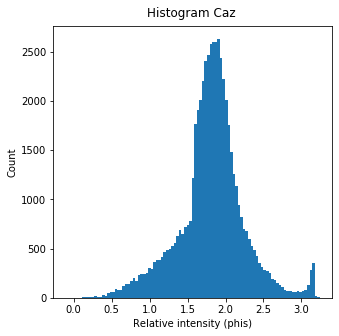

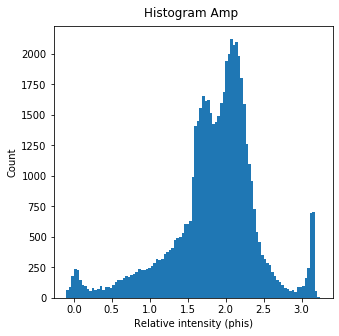

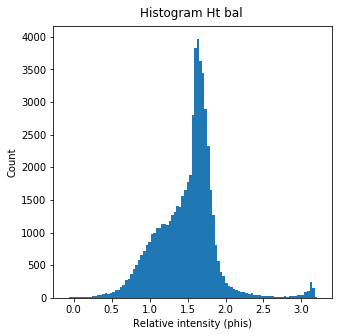

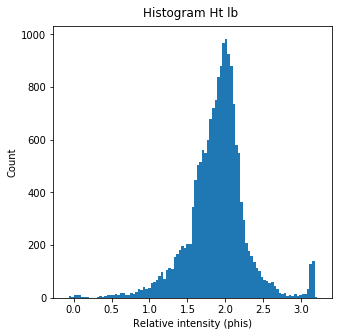

In [0]:
caz_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]["phis_N01"])
amp_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]["phis_N01"])
htbal_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]["phis_N01"])
lb_p=list(df_pops_lim2[df_pops_lim2["pop"]=="HT-LB"]["phis_N01"])

lprange=np.linspace(-.1,np.pi+.1,100)

plot_phi_hist(caz_p,lprange,"Caz")
plot_phi_hist(amp_p,lprange,"Amp")
plot_phi_hist(htbal_p,lprange,"Ht bal")
plot_phi_hist(lb_p,lprange,"Ht lb")


In [0]:
caz_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]["phis_N01"])
amp_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]["phis_N01"])
htbal_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]["phis_N01"])
lb_p=list(df_pops_lim2[df_pops_lim2["pop"]=="HT-LB"]["phis_N01"])

anova_res=st.f_oneway(caz_p,amp_p,htbal_p,lb_p)
print("Anova (f-one way):")
print("Assume normality, equal std, independence \n null hypothesis that two or more groups have the same population mean.\n\t-Significant value means that at least two groups are different.")
print("Anova all vs all:",anova_res)
anova_res=st.f_oneway(caz_p,amp_p)
print("Anova caz vs amp:",anova_res)
anova_res=st.f_oneway(caz_p,htbal_p)
print("Anova caz vs Ht-bal:",anova_res)
anova_res=st.f_oneway(amp_p,htbal_p)
print("Anova amp vs Ht-bal:",anova_res)
anova_res=st.f_oneway(lb_p,htbal_p)
print("Anova lb vs Ht-bal:",anova_res)
anova_res=st.f_oneway(htbal_p,htbal_p)
print("Anova Ht-bal vs Ht-bal:",anova_res)

print("\n\n\n")
print("Kruskal-Wallis:")
print("null hypothesis all means are equals.\n\t-Significant value means that at least two groups are different.")
anova_res=st.kruskal(caz_p,amp_p,htbal_p,lb_p)
print("kruskal all vs all:",anova_res)
anova_res=st.kruskal(caz_p,amp_p)
print("kruskal caz vs amp:",anova_res)
anova_res=st.kruskal(caz_p,htbal_p)
print("kruskal caz vs Ht-bal:",anova_res)
anova_res=st.kruskal(amp_p,htbal_p)
print("kruskal amp vs Ht-bal:",anova_res)
anova_res=st.kruskal(lb_p,htbal_p)
print("kruskal lb vs Ht-bal:",anova_res)
anova_res=st.kruskal(htbal_p,htbal_p)
print("kruskal Ht-bal vs Ht-bal:",anova_res)
 
print("\n\n\n")
print("Mann-Whitney:")
print("null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population\n\t-Significant value means that at least two groups are different.")
anova_res=st.mannwhitneyu(caz_p,amp_p,alternative="two-sided")
print("Mann-Whitney caz vs amp:",anova_res)
anova_res=st.mannwhitneyu(caz_p,htbal_p,alternative="two-sided")
print("Mann-Whitney caz vs Ht-bal:",anova_res)
anova_res=st.mannwhitneyu(amp_p,htbal_p,alternative="two-sided")
print("Mann-Whitney amp vs Ht-bal:",anova_res)
anova_res=st.mannwhitneyu(lb_p,htbal_p,alternative="two-sided")
print("Mann-Whitney lb vs Ht-bal:",anova_res)
anova_res=st.mannwhitneyu(htbal_p,htbal_p,alternative="two-sided")
print("Mann-Whitney Ht-bal vs Ht-bal:",anova_res)



print("\n\n\n")
print("Kolmogorov-Smirnov:")
print("null hypothesis that the two distributions are identical\n\t-Significant value means that at least two groups are different.")
anova_res=st.ks_2samp(caz_p,amp_p)
print("Kolmogorov-Smirnov caz vs amp:",anova_res)
anova_res=st.ks_2samp(caz_p,htbal_p)
print("Kolmogorov-Smirnov caz vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(amp_p,htbal_p)
print("Kolmogorov-Smirnov amp vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(lb_p,htbal_p)
print("Kolmogorov-Smirnov lb vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(htbal_p,htbal_p)
print("Kolmogorov-Smirnov Ht-bal vs Ht-bal:",anova_res)

# print("\n\n\n")
# print("Kolmogorov-Smirnov:")
# print("null hypothesis that the two distributions are identical\n\t-Significant value means that at least two groups are different.")
# anova_res=st.kstwobign(caz_p,amp_p)

# print("Kolmogorov-Smirnov caz vs amp:",anova_res.sf)
# anova_res=st.kstwobign(caz_p,htbal_p)
# print("Kolmogorov-Smirnov caz vs Ht-bal:",anova_res)
# anova_res=st.kstwobign(amp_p,htbal_p)
# print("Kolmogorov-Smirnov amp vs Ht-bal:",anova_res)
# anova_res=st.kstwobign(lb_p,htbal_p)
# print("Kolmogorov-Smirnov lb vs Ht-bal:",anova_res)
# anova_res=st.kstwobign(htbal_p,htbal_p)
# print("Kolmogorov-Smirnov Ht-bal vs Ht-bal:",anova_res)



Anova (f-one way):
Assume normality, equal std, independence 
 null hypothesis that two or more groups have the same population mean.
	-Significant value means that at least two groups are different.
Anova all vs all: F_onewayResult(statistic=7357.906231961504, pvalue=0.0)
Anova caz vs amp: F_onewayResult(statistic=130.7742108058119, pvalue=2.8828788488401547e-30)
Anova caz vs Ht-bal: F_onewayResult(statistic=15825.540648615646, pvalue=0.0)
Anova amp vs Ht-bal: F_onewayResult(statistic=14109.960441230089, pvalue=0.0)
Anova lb vs Ht-bal: F_onewayResult(statistic=11651.940938946109, pvalue=0.0)
Anova Ht-bal vs Ht-bal: F_onewayResult(statistic=9.718571911488591e-29, pvalue=1.0)




Kruskal-Wallis:
null hypothesis all means are equals.
	-Significant value means that at least two groups are different.
kruskal all vs all: KruskalResult(statistic=33425.94678751065, pvalue=0.0)
kruskal caz vs amp: KruskalResult(statistic=1035.7337690168642, pvalue=3.0702050899106793e-227)
kruskal caz vs Ht-bal

In [0]:
## Statistics with N = 1000

In [0]:
caz_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]["phis_N01"])
amp_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]["phis_N01"])
htbal_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]["phis_N01"])
lb_p=list(df_pops_lim2[df_pops_lim2["pop"]=="HT-LB"]["phis_N01"])

caz_p=random.sample(caz_p,1000)
amp_p=random.sample(amp_p,1000)
htbal_p=random.sample(htbal_p,1000)
lb_p=random.sample(lb_p,1000)




anova_res=st.f_oneway(caz_p,amp_p,htbal_p,lb_p)
print("Anova (f-one way):")
print("Assume normality, equal std, independence \n null hypothesis that two or more groups have the same population mean.\n\t-Significant value means that at least two groups are different.")
print("Anova all vs all:",anova_res)
anova_res=st.f_oneway(caz_p,amp_p)
print("Anova caz vs amp:",anova_res)
anova_res=st.f_oneway(caz_p,htbal_p)
print("Anova caz vs Ht-bal:",anova_res)
anova_res=st.f_oneway(amp_p,htbal_p)
print("Anova amp vs Ht-bal:",anova_res)
anova_res=st.f_oneway(lb_p,htbal_p)
print("Anova lb vs Ht-bal:",anova_res)
anova_res=st.f_oneway(htbal_p,htbal_p)
print("Anova Ht-bal vs Ht-bal:",anova_res)

print("\n\n\n")
print("Kruskal-Wallis:")
print("null hypothesis all means are equals.\n\t-Significant value means that at least two groups are different.")
anova_res=st.kruskal(caz_p,amp_p,htbal_p,lb_p)
print("kruskal all vs all:",anova_res)
anova_res=st.kruskal(caz_p,amp_p)
print("kruskal caz vs amp:",anova_res)
anova_res=st.kruskal(caz_p,htbal_p)
print("kruskal caz vs Ht-bal:",anova_res)
anova_res=st.kruskal(amp_p,htbal_p)
print("kruskal amp vs Ht-bal:",anova_res)
anova_res=st.kruskal(lb_p,htbal_p)
print("kruskal lb vs Ht-bal:",anova_res)
anova_res=st.kruskal(htbal_p,htbal_p)
print("kruskal Ht-bal vs Ht-bal:",anova_res)
 
print("\n\n\n")
print("Mann-Whitney:")
print("null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population\n\t-Significant value means that at least two groups are different.")
anova_res=st.mannwhitneyu(caz_p,amp_p,alternative="two-sided")
print("Mann-Whitney caz vs amp:",anova_res)
anova_res=st.mannwhitneyu(caz_p,htbal_p,alternative="two-sided")
print("Mann-Whitney caz vs Ht-bal:",anova_res)
anova_res=st.mannwhitneyu(amp_p,htbal_p,alternative="two-sided")
print("Mann-Whitney amp vs Ht-bal:",anova_res)
anova_res=st.mannwhitneyu(lb_p,htbal_p,alternative="two-sided")
print("Mann-Whitney lb vs Ht-bal:",anova_res)
anova_res=st.mannwhitneyu(htbal_p,htbal_p,alternative="two-sided")
print("Mann-Whitney Ht-bal vs Ht-bal:",anova_res)



print("\n\n\n")
print("Kolmogorov-Smirnov:")
print("null hypothesis that the two distributions are identical\n\t-Significant value means that at least two groups are different.")
anova_res=st.ks_2samp(caz_p,amp_p)
print("Kolmogorov-Smirnov caz vs amp:",anova_res)
anova_res=st.ks_2samp(caz_p,htbal_p)
print("Kolmogorov-Smirnov caz vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(amp_p,htbal_p)
print("Kolmogorov-Smirnov amp vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(lb_p,htbal_p)
print("Kolmogorov-Smirnov lb vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(htbal_p,htbal_p)
print("Kolmogorov-Smirnov Ht-bal vs Ht-bal:",anova_res)

# print("\n\n\n")
# print("Kolmogorov-Smirnov:")
# print("null hypothesis that the two distributions are identical\n\t-Significant value means that at least two groups are different.")
# anova_res=st.kstwobign(caz_p,amp_p)

# print("Kolmogorov-Smirnov caz vs amp:",anova_res.sf)
# anova_res=st.kstwobign(caz_p,htbal_p)
# print("Kolmogorov-Smirnov caz vs Ht-bal:",anova_res)
# anova_res=st.kstwobign(amp_p,htbal_p)
# print("Kolmogorov-Smirnov amp vs Ht-bal:",anova_res)
# anova_res=st.kstwobign(lb_p,htbal_p)
# print("Kolmogorov-Smirnov lb vs Ht-bal:",anova_res)
# anova_res=st.kstwobign(htbal_p,htbal_p)
# print("Kolmogorov-Smirnov Ht-bal vs Ht-bal:",anova_res)



Anova (f-one way):
Assume normality, equal std, independence 
 null hypothesis that two or more groups have the same population mean.
	-Significant value means that at least two groups are different.
Anova all vs all: F_onewayResult(statistic=148.96273636331284, pvalue=1.64944008982324e-91)
Anova caz vs amp: F_onewayResult(statistic=4.060160364153576, pvalue=0.044040044205366405)
Anova caz vs Ht-bal: F_onewayResult(statistic=239.17506454187674, pvalue=4.7852308040851067e-51)
Anova amp vs Ht-bal: F_onewayResult(statistic=234.80783537956953, pvalue=3.397982264198494e-50)
Anova lb vs Ht-bal: F_onewayResult(statistic=397.6461293572442, pvalue=7.800288158853419e-81)
Anova Ht-bal vs Ht-bal: F_onewayResult(statistic=0.0, pvalue=1.0)




Kruskal-Wallis:
null hypothesis all means are equals.
	-Significant value means that at least two groups are different.
kruskal all vs all: KruskalResult(statistic=661.3260732281924, pvalue=5.101183341182502e-143)
kruskal caz vs amp: KruskalResult(statistic=25

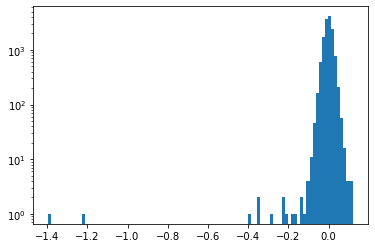

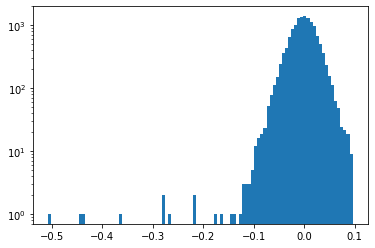

-0.00020714250627044368 0.039891074884883124
-0.0007459478195355508 0.03223120504662415

 0.1992482319181452 0.16041007741358518


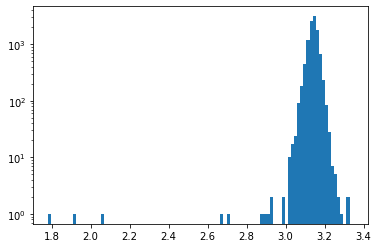

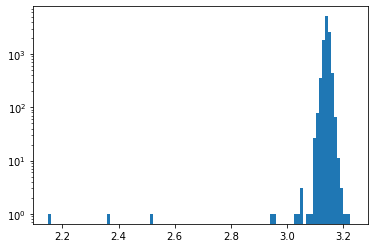

3.1414129729242917 0.04051845141100421
3.1413714616749875 0.01849200226263082

 2.9388207158692707 3.0489114503618335


In [0]:
pop="pBGT"
sub_dfg=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
sub_dfg01=sub_dfg[(sub_dfg["phis_01"]<sub_dfg.phis_01.mean()+3*sub_dfg.phis_01.std())
             &(sub_dfg["phis_01"]>sub_dfg.phis_01.mean()-3*sub_dfg.phis_01.std())
             ]
sub_dfgN01=sub_dfg[(sub_dfg["phis_N01"]<sub_dfg.phis_N01.mean()+3*sub_dfg.phis_N01.std())
             &(sub_dfg["phis_N01"]>sub_dfg.phis_N01.mean()-3*sub_dfg.phis_N01.std())
             ]


# lrhos=sub_dfg.phis
# rrange=np.linspace(lrhos.min(),lrhos.mean()+3*lrhos.std(),100)
# n,bins,patches=plt.hist(lrhos,bins=rrange)#,density='true')
# plt.yscale('log')
# plt.show()
lrhos=sub_dfg01.phis_01
rrange=np.linspace(lrhos.min(),lrhos.mean()+3*lrhos.std(),100)
n,bins,patchess=plt.hist(lrhos,bins=rrange)#,density='true')
plt.yscale('log')
plt.show()
lrhos=sub_dfgN01.phis_N01
rrange=np.linspace(lrhos.min(),lrhos.mean()+3*lrhos.std(),100)
n,bins,patchess=plt.hist(lrhos,bins=rrange)#,density='true')
plt.yscale('log')
plt.show()


g1_cutoff=sub_dfg01.phis_01.mean()+5*sub_dfg01.phis_01.std()
#g1_cutoff=sub_dfg01.phis_01.max()
print(sub_dfg01.phis_01.mean(),sub_dfg01.phis_01.std())
g1_cutoffN=sub_dfgN01.phis_N01.mean()+5*sub_dfgN01.phis_N01.std()

print(sub_dfgN01.phis_N01.mean(),sub_dfgN01.phis_N01.std())

print("\n",g1_cutoff,g1_cutoffN)

pop="pBRT"
sub_dfr=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
sub_dfr01=sub_dfr[(sub_dfr["phis_01"]<sub_dfr.phis_01.mean()+5*sub_dfr.phis_01.std())
                 &(sub_dfr["phis_01"]>sub_dfr.phis_01.mean()-5*sub_dfr.phis_01.std())
             ]
sub_dfrN01=sub_dfr[(sub_dfr["phis_N01"]<sub_dfr.phis_N01.mean()+5*sub_dfr.phis_N01.std())
                  &(sub_dfr["phis_N01"]>sub_dfr.phis_N01.mean()-5*sub_dfr.phis_N01.std())
                  ]

# lrhos=sub_dfr.phis
# rrange=np.linspace(lrhos.min(),lrhos.mean()+3*lrhos.std(),100)
# n,bins,patches=plt.hist(lrhos,bins=rrange)#,density='true')
# plt.yscale('log')
# plt.show()
lrhos=sub_dfr01.phis_01
rrange=np.linspace(lrhos.min(),lrhos.mean()+5*lrhos.std(),100)
n,bins,patchess=plt.hist(lrhos,bins=rrange)#,density='true')
plt.yscale('log')
plt.show()
lrhos=sub_dfrN01.phis_N01
rrange=np.linspace(lrhos.min(),lrhos.mean()+5*lrhos.std(),100)
n,bins,patchess=plt.hist(lrhos,bins=rrange)#,density='true')
plt.yscale('log')
plt.show()

r12_cutoff=sub_dfr01.phis_01.mean()-5*sub_dfr01.phis_01.std()
#r12_cutoff=sub_dfr01.phis_01.min()
print(sub_dfr01.phis_01.mean(),sub_dfr01.phis_01.std())
r12_cutoffN=sub_dfrN01.phis_N01.mean()-5*sub_dfrN01.phis_N01.std()
print(sub_dfrN01.phis_N01.mean(),sub_dfrN01.phis_N01.std())

print("\n",r12_cutoff,r12_cutoffN)


In [0]:
def plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct):
    
    if(angle_type=="phis_N01"):
        rho_type="rhos_N01"
    elif(angle_type=="phis_01"):
        rho_type="rhos_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alph)
    
    ax.plot([0,g1ct],[0,1],c='g',alpha=.25)
    ax.plot([0,r12ct],[0,1],c='r',alpha=.25)
    
    
    this_moments=st.describe(phis01)
    print(this_moments)
    hts=[]
    g1s=[]
    r12s=[]
    for p in phis01:
        if(p<g1ct):
            g1s.append(p)
        elif(p>r12ct):
            r12s.append(p)
        else:
            hts.append(p)
    print(len(g1s),len(hts),len(r12s))
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)

    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax,len(g1s),len(hts),len(r12s),this_moments


DescribeResult(nobs=56828, minmax=(-0.09969476467295879, 3.3186584392271743), mean=1.8149736105406686, variance=0.18818222598345716, skewness=-0.052615862496102256, kurtosis=1.426680662613001)
14 55844 970
DescribeResult(nobs=58062, minmax=(-9.770331908031887, 5.506029388546037), mean=1.485572119684363, variance=0.20544952094617253, skewness=-3.211015242984524, kurtosis=58.24938812208728)
171 57226 665
DescribeResult(nobs=56197, minmax=(-1.5811838348502503, 3.2415352733665266), mean=1.8496850257276762, variance=0.3332870483393764, skewness=-0.7793900738587407, kurtosis=1.7142976329133095)
1183 52990 2024


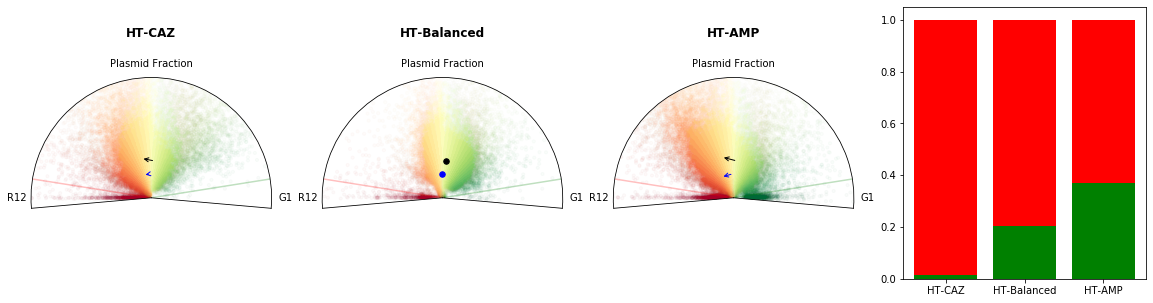

In [0]:
fig= plt.figure( figsize=(20, 5))
alph=.025
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phis_N01"    

if(angle_type=="phis_01"):
    g1ct=g1_cutoff
    r12ct=r12_cutoff
if(angle_type=="phis_N01"):
    g1ct=g1_cutoffN
    r12ct=r12_cutoffN

    




g1ct=np.pi/20
r12ct=np.pi-g1ct

gs=[]
rs=[]
hts=[]
##################################################################
axb=fig.add_subplot(144) 


ax=fig.add_subplot(141,projection='polar') 
#pop="HT-C12-1"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
name="HT-CAZ"


ax,gn,htn,rn,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
gs.append(gn)
rs.append(rn)
hts.append(htn)



ax=fig.add_subplot(142,projection='polar') 
#pop="HT-1505-2"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=pd.DataFrame()
name="HT-Balanced"

ax,gn,htn,rn,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
gs.append(gn)
rs.append(rn)
hts.append(htn)


ax=fig.add_subplot(143,projection='polar') 
name="HT-AMP"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ax,gn,htn,rn,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
gs.append(gn)
rs.append(rn)
hts.append(htn)

totals=[x+y+z for x,y,z in zip(gs,rs,hts)]
totals=[x+y for x,y in zip(gs,rs)]
gs=[g/t for g,t in zip(gs,totals)]
rs=[r/t for r,t in zip(rs,totals)]
#hts=[h/t for h,t in zip(hts,totals)]
x=[1,2,3]
labels=['HT-CAZ','HT-Balanced','HT-AMP']
axb.bar(x,gs,color='g')
#axb.bar(x,hts,bottom=gs,color='yellow')
axb.bar(x,rs,bottom=gs,color='r')
#axb.bar(x,rs,bottom=hts,color='r')
axb.set_xticks(x)
axb.set_xticklabels(labels)
#plt.savefig("./HT_AMNIS_1-day_selection_all_reps_nolb.png")
plt.show()

DescribeResult(nobs=56828, minmax=(-0.09969476467295879, 3.3186584392271743), mean=1.8149736105406686, variance=0.18818222598345716, skewness=-0.052615862496102256, kurtosis=1.426680662613001)
14 55966 848
DescribeResult(nobs=58062, minmax=(-9.770331908031887, 5.506029388546037), mean=1.485572119684363, variance=0.20544952094617253, skewness=-3.211015242984524, kurtosis=58.24938812208728)
174 57319 569
DescribeResult(nobs=56197, minmax=(-1.5811838348502503, 3.2415352733665266), mean=1.8496850257276762, variance=0.3332870483393764, skewness=-0.7793900738587407, kurtosis=1.7142976329133095)
1193 53168 1836


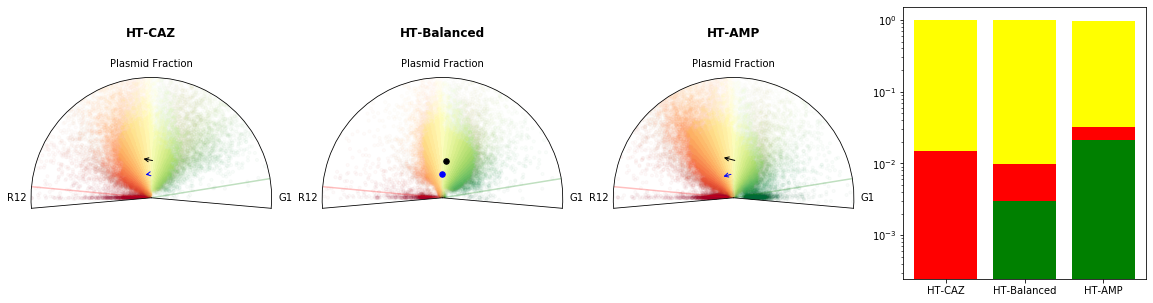

In [0]:
fig= plt.figure( figsize=(20, 5))
alph=.025
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phis_N01"    

if(angle_type=="phis_01"):
    g1ct=g1_cutoff
    r12ct=r12_cutoff
if(angle_type=="phis_N01"):
    g1ct=g1_cutoffN
    r12ct=r12_cutoffN

    




# g1ct=np.pi/20
# r12ct=np.pi-g1ct

gs=[]
rs=[]
hts=[]
##################################################################
axb=fig.add_subplot(144) 


ax=fig.add_subplot(141,projection='polar') 
#pop="HT-C12-1"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
name="HT-CAZ"


ax,gn,htn,rn,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
gs.append(gn)
rs.append(rn)
hts.append(htn)



ax=fig.add_subplot(142,projection='polar') 
#pop="HT-1505-2"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=pd.DataFrame()
name="HT-Balanced"

ax,gn,htn,rn,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
gs.append(gn)
rs.append(rn)
hts.append(htn)


ax=fig.add_subplot(143,projection='polar') 
name="HT-AMP"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ax,gn,htn,rn,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
gs.append(gn)
rs.append(rn)
hts.append(htn)

totals=[x+y+z for x,y,z in zip(gs,rs,hts)]
#totals=[x+y for x,y in zip(gs,rs)]
gs=[g/t for g,t in zip(gs,totals)]
rs=[r/t for r,t in zip(rs,totals)]
hts=[h/t for h,t in zip(hts,totals)]
x=[1,2,3]
labels=['HT-CAZ','HT-Balanced','HT-AMP']
axb.bar(x,gs,color='g')
axb.bar(x,rs,bottom=gs,color='r')
axb.bar(x,hts,bottom=rs,color='yellow')
# axb.bar(x,gs,color='g')
# axb.bar(x,hts,bottom=gs,color='yellow')
# axb.bar(x,rs,bottom=hts,color='r')




axb.set_yscale("log")
axb.set_xticks(x)
axb.set_xticklabels(labels)
#plt.savefig("./HT_AMNIS_1-day_selection_all_reps_nolb.png")
plt.show()

DescribeResult(nobs=56828, minmax=(-0.09969476467295879, 3.3186584392271743), mean=1.8149736105406686, variance=0.18818222598345716, skewness=-0.052615862496102256, kurtosis=1.426680662613001)
21 55727 1080


/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


DescribeResult(nobs=58062, minmax=(-9.770331908031887, 5.506029388546037), mean=1.485572119684363, variance=0.20544952094617253, skewness=-3.211015242984524, kurtosis=58.24938812208728)
197 57126 739
DescribeResult(nobs=56197, minmax=(-1.5811838348502503, 3.2415352733665266), mean=1.8496850257276762, variance=0.3332870483393764, skewness=-0.7793900738587407, kurtosis=1.7142976329133095)
1301 52747 2149


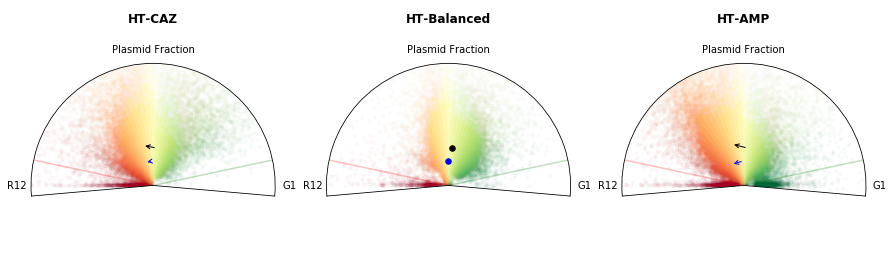

DescribeResult(nobs=56828, minmax=(-0.07866050891333785, 3.5853928621047912), mean=1.5931531050199368, variance=0.14168785672226974, skewness=0.2368532041647486, kurtosis=4.43868441956826)
28 55971 829


/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


DescribeResult(nobs=58062, minmax=(-26.64767882418894, 5.118443512970342), mean=1.3343551134797413, variance=0.35201965537584845, skewness=-18.252961226381633, kurtosis=675.2775777047254)
232 57276 554
DescribeResult(nobs=56197, minmax=(-1.2841372755866745, 3.395833219583623), mean=1.6070455384696911, variance=0.2641489901895018, skewness=-0.324114197651493, kurtosis=3.092593568762603)
1406 52996 1795


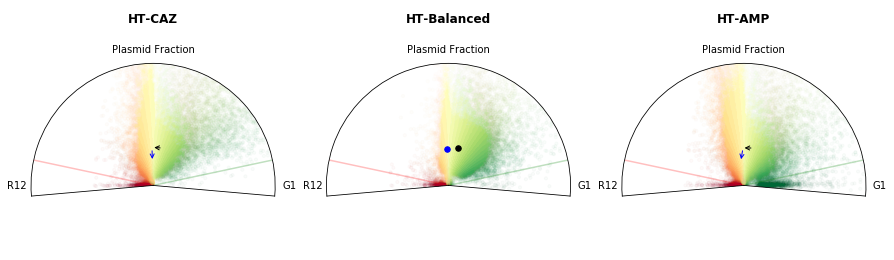

In [0]:

alph=.025
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phis_N01"    

if(angle_type=="phis_01"):
    g1ct=g1_cutoff
    r12ct=r12_cutoff
if(angle_type=="phis_N01"):
    g1ct=g1_cutoffN
    r12ct=r12_cutoffN

    




g1ct=np.pi/15
r12ct=np.pi-g1ct


##################################################################



















##################################################################

fig= plt.figure( figsize=(15, 5))



ax=fig.add_subplot(131,projection='polar') 
#pop="HT-C12-1"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
name="HT-CAZ"


ax=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)

ax=fig.add_subplot(132,projection='polar') 


ax=fig.add_subplot(132,projection='polar') 
#pop="HT-1505-2"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=pd.DataFrame()
name="HT-Balanced"

ax=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)


ax=fig.add_subplot(133,projection='polar') 
name="HT-AMP"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ax=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)

#plt.savefig("./HT_AMNIS_1-day_selection_all_reps_nolb.png")
plt.show()





fig= plt.figure( figsize=(15, 5))
alph=.025
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phis_01"    

if(angle_type=="phis_01"):
    g1ct=g1_cutoff
    r12ct=r12_cutoff
if(angle_type=="phis_N01"):
    g1ct=g1_cutoffN
    r12ct=r12_cutoffN

    




g1ct=np.pi/15
r12ct=np.pi-g1ct


##################################################################
ax=fig.add_subplot(131,projection='polar') 
#pop="HT-C12-1"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
name="HT-CAZ"


ax=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)

ax=fig.add_subplot(132,projection='polar') 


ax=fig.add_subplot(132,projection='polar') 
#pop="HT-1505-2"
#this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=pd.DataFrame()
name="HT-Balanced"

ax=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)


ax=fig.add_subplot(133,projection='polar') 
name="HT-AMP"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ax=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)

#plt.savefig("./HT_AMNIS_1-day_selection_all_reps_nolb.png")
plt.show()

In [0]:
def plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop):
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phis_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    
        
    
    ref_devs=ref_df[prop]
    
    h,n=np.histogram(ref_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
    
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
              #  facecolor=cmap((ib+1)/len(n)),
                facecolor='gray',
                alpha=.5
            )
        )
    
    ax.set_xlim([lrange[0],lrange[-1]])
    ax.set_ylim([0,1])
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    print(len(h),len(n))
    
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor=cmap((ib+1)/len(n))
            )
        )
    
    return ax

def plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop):
    
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phis_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    
    ref_devs=ref_df[prop]
    ref_den=st.gaussian_kde(ref_devs)
    ref_ys=ref_den(lrange)
    maxr=np.max(ref_ys)
    ref_ys=[x/maxr for x in ref_ys]
    
    points = np.array([lrange, ref_ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
#     cols=[cmap(i/len(lrange)) for i,x in enumerate(lrange)]
#     lc = LineCollection(segments, colors=cols)
    lc = LineCollection(segments, colors="gray")
    
    lc.set_linewidth(5)
    lc.set_alpha(.5)
    ax.add_collection(lc)
    
    this_devs=this_df[prop]
    this_den=st.gaussian_kde(this_devs)
    this_ys=this_den(lrange)
    maxt=np.max(this_ys)
    this_ys=[x/maxt for x in this_ys]
    
    points = np.array([lrange, this_ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    cols=[cmap(i/len(lrange)) for i,x in enumerate(lrange)]
    
    lc = LineCollection(segments, colors=cols)
    lc.set_linewidth(5)
    ax.add_collection(lc)
    
    #ax.plot(lrange,this_ys)
    
    ax.set_xlim([lrange[0],lrange[-1]])
    ax.set_ylim([0,1])
    
    return ax

def plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop):
    
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phis_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    
    
    ref_devs=ref_df[prop]
    ref_den=st.gaussian_kde(ref_devs)
    ref_ys=ref_den(lrange)
    maxr=np.max(ref_ys)
    ref_ys=[x/maxr for x in ref_ys]
    
    ax.plot(lrange,ref_ys,c='k')
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor=cmap((ib+1)/len(n))
                )
            )
    
    
    ax.set_xlim([lrange[0],lrange[-1]])
    
    return ax







100 100


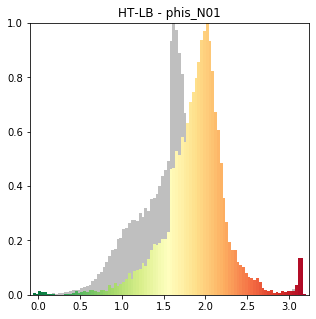

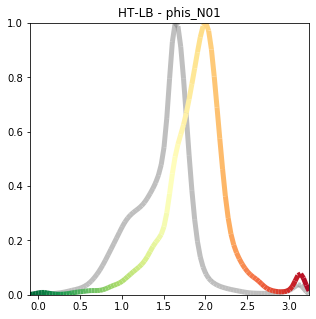

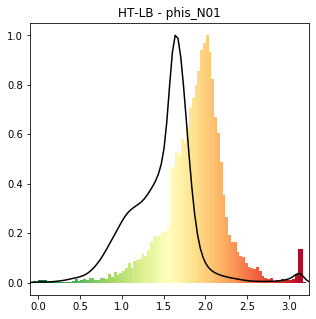

In [0]:

this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-LB")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
name="HT-LB"
prop="phis_N01"
lrange=np.linspace(-2,2,101)
lrange=np.linspace(0-.1,np.pi+.1,101)

fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()


DescribeResult(nobs=56828, minmax=(-0.09969476467295879, 3.3186584392271743), mean=1.8149736105406686, variance=0.18818222598345716, skewness=-0.052615862496102256, kurtosis=1.426680662613001)
14 55966 848


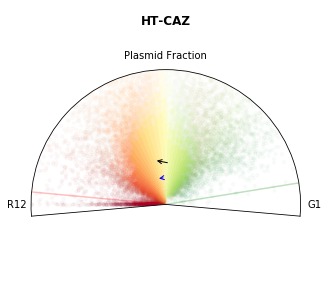

100 100


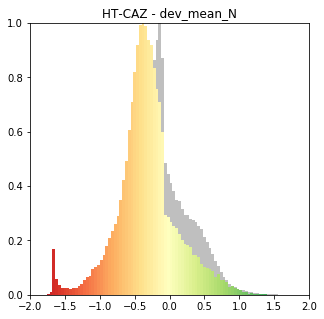

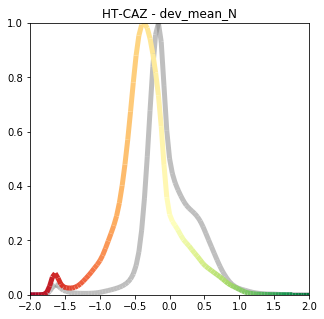

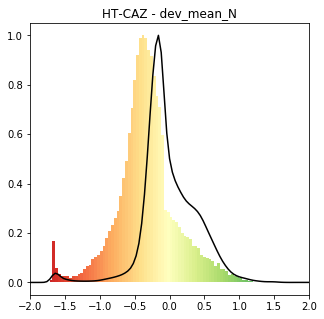

100 100


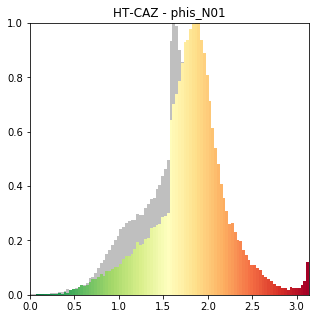

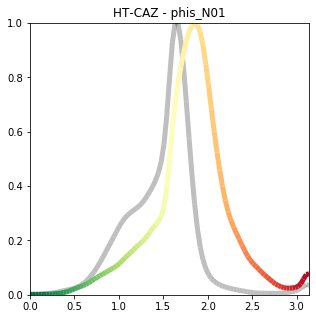

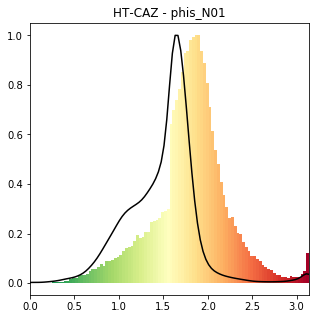

DescribeResult(nobs=58062, minmax=(-9.770331908031887, 5.506029388546037), mean=1.485572119684363, variance=0.20544952094617253, skewness=-3.211015242984524, kurtosis=58.24938812208728)
174 57319 569


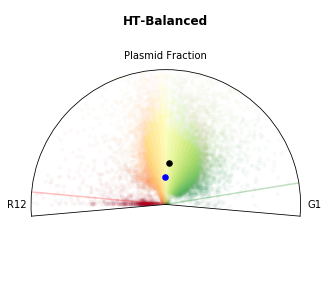

100 100


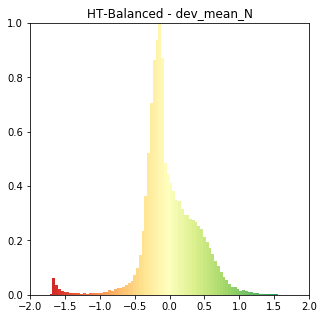

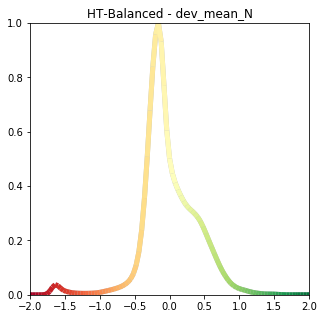

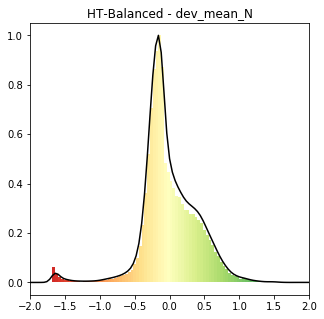

DescribeResult(nobs=56197, minmax=(-1.5811838348502503, 3.2415352733665266), mean=1.8496850257276762, variance=0.3332870483393764, skewness=-0.7793900738587407, kurtosis=1.7142976329133095)
1193 53168 1836


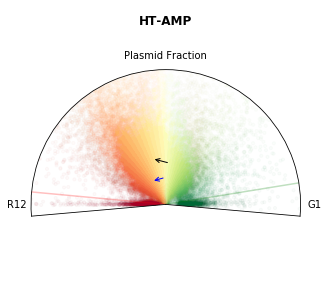

100 100


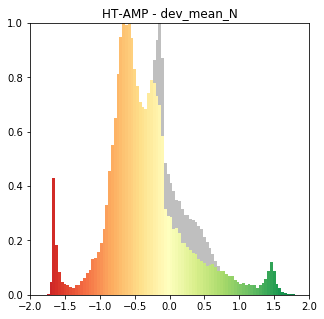

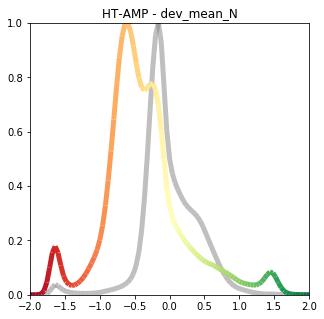

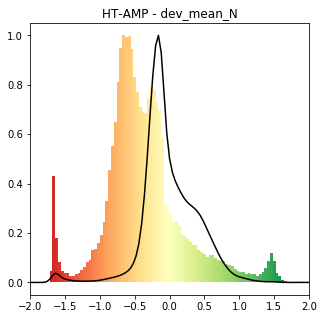

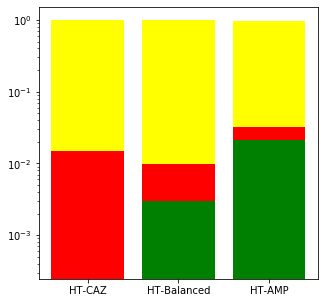

DescribeResult(nobs=17888, minmax=(-0.05831723127747135, 3.185169950614718), mean=1.8907317057488888, variance=0.15112352214176705, skewness=-0.26487451340816837, kurtosis=3.139057113721057)
44 17529 315


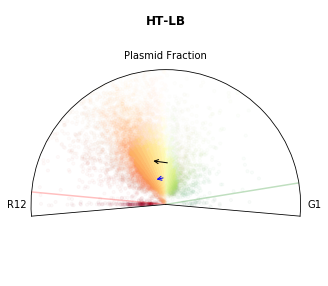

100 100


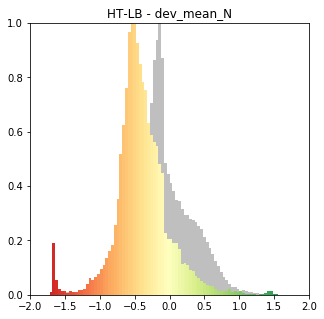

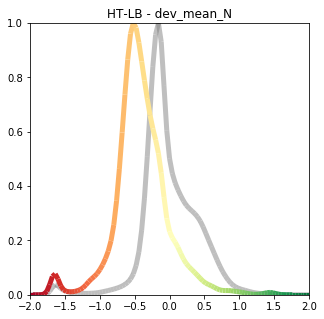

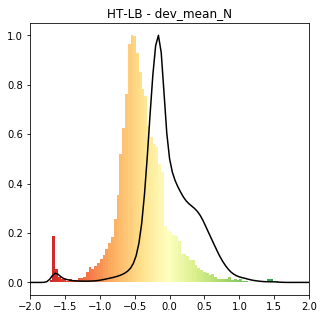

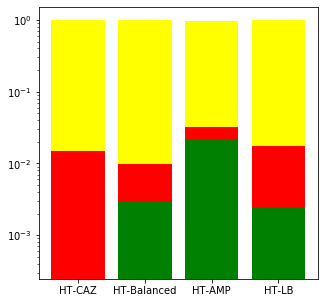

In [0]:

alph=.025
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phis_N01"    

if(angle_type=="phis_01"):
    g1ct=g1_cutoff
    r12ct=r12_cutoff
if(angle_type=="phis_N01"):
    g1ct=g1_cutoffN
    r12ct=r12_cutoffN

    

gs=[]
rs=[]
hts=[]


##################################################################
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
name="HT-CAZ"



fig= plt.figure( figsize=(5, 5))
ax=fig.add_subplot(111,projection='polar') 

ax,gn_c,htn_c,rn_c,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
plt.show()
gs.append(gn_c)
rs.append(rn_c)
hts.append(htn_c)



prop="dev_mean_N"
lrange=np.linspace(-2,2,101)

fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()



prop="phis_N01"
lrange=np.linspace(0,np.pi,101)

fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()




#####################################################################
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=pd.DataFrame()
name="HT-Balanced"



fig= plt.figure( figsize=(5, 5))
ax=fig.add_subplot(111,projection='polar') 
ax,gn_0,htn_0,rn_0,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
plt.show()

gs.append(gn_0)
rs.append(rn_0)
hts.append(htn_0)

ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]


prop="dev_mean_N"
lrange=np.linspace(-2,2,101)

fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()



##############################################################################

name="HT-AMP"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]


fig= plt.figure( figsize=(5, 5))
ax=fig.add_subplot(111,projection='polar') 

ax,gn_a,htn_a,rn_a,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
plt.show()


gs.append(gn_a)
rs.append(rn_a)
hts.append(htn_a)


prop="dev_mean_N"
lrange=np.linspace(-2,2,101)

fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
##########################################################################
fig= plt.figure( figsize=(5, 5))
axb=fig.add_subplot(111) 



totals=[x+y+z for x,y,z in zip(gs,rs,hts)]
#totals=[x+y for x,y in zip(gs,rs)]
gsn=[g/t for g,t in zip(gs,totals)]
rsn=[r/t for r,t in zip(rs,totals)]
htsn=[h/t for h,t in zip(hts,totals)]
x=[1,2,3]
labels=['HT-CAZ','HT-Balanced','HT-AMP']
axb.bar(x,gsn,color='g')
axb.bar(x,rsn,bottom=gsn,color='r')
axb.bar(x,htsn,bottom=rsn,color='yellow')
# axb.bar(x,gs,color='g')
# axb.bar(x,hts,bottom=gs,color='yellow')
# axb.bar(x,rs,bottom=hts,color='r')
axb.set_yscale("log")
axb.set_xticks(x)
axb.set_xticklabels(labels)

plt.show()


###################################################################################
name="HT-LB"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-LB")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]


fig= plt.figure( figsize=(5, 5))
ax=fig.add_subplot(111,projection='polar') 

ax,gn_lb,htn_lb,rn_lb,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)
plt.show()
gs.append(gn_lb)
rs.append(rn_lb)
hts.append(htn_lb)

prop="dev_mean_N"
lrange=np.linspace(-2,2,101)

fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_hists(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_dens(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()
fig,ax=plt.subplots(figsize=(5,5))
ax=plot_deviation_distributions_mix(ax,this_df,ref_df,lrange,prop)
plt.title("%s - %s"%(name,prop))
plt.show()




#############################################################################3333

fig= plt.figure( figsize=(5, 5))
axb=fig.add_subplot(111) 

totals=[x+y+z for x,y,z in zip(gs,rs,hts)]
#totals=[x+y for x,y in zip(gs,rs)]
gs=[g/t for g,t in zip(gs,totals)]
rs=[r/t for r,t in zip(rs,totals)]
hts=[h/t for h,t in zip(hts,totals)]
x=[1,2,3,4]
labels=['HT-CAZ','HT-Balanced','HT-AMP',"HT-LB"]
axb.bar(x,gs,color='g')
axb.bar(x,rs,bottom=gs,color='r')
axb.bar(x,hts,bottom=rs,color='yellow')
# axb.bar(x,gs,color='g')
# axb.bar(x,hts,bottom=gs,color='yellow')
# axb.bar(x,rs,bottom=hts,color='r')
axb.set_yscale("log")
axb.set_xticks(x)
axb.set_xticklabels(labels)

plt.show()







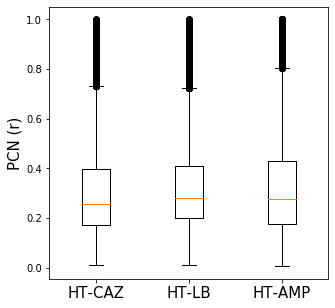

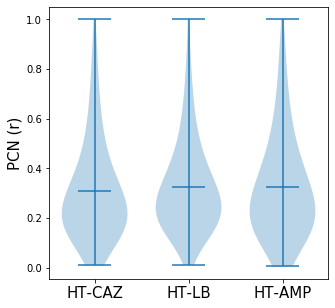

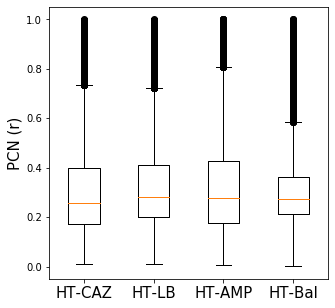

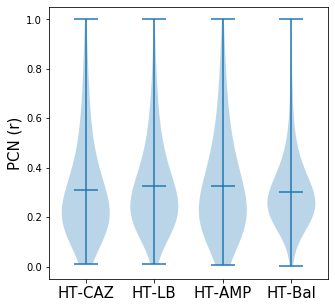

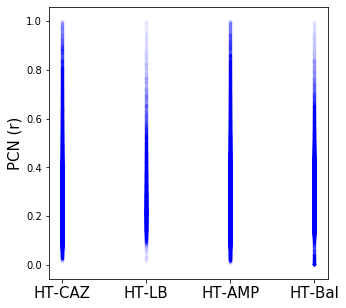

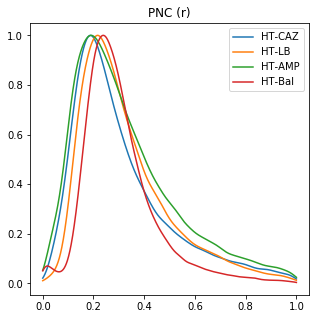

In [0]:
prop="rhos_N01"
caz_r=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")][prop])
amp_r=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")][prop])
htbal_r=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")][prop])
lb_r=list(df_pops_lim2[df_pops_lim2["pop"]=="HT-LB"][prop])

caz_r=[x  for x in caz_r if x <1]
amp_r=[x  for x in amp_r if x <1]
lb_r=[x  for x in lb_r if x <1]
htbal_r=[x  for x in htbal_r if x <1]


bdata=[caz_r,lb_r,amp_r]

fig,ax=plt.subplots(figsize=(5,5))
ax.boxplot(bdata)
ax.set_xticklabels(["HT-CAZ","HT-LB","HT-AMP"],fontsize=15)
ax.set_ylabel("PCN (r)",fontsize=15)
plt.show()


fig,ax=plt.subplots(figsize=(5,5))
pos=[1,2,3]
ax.violinplot(bdata,pos,widths=0.7, showmeans=True,
                      showextrema=True,  bw_method=0.5)
ax.set_xticks(pos)
ax.set_xticklabels(["HT-CAZ","HT-LB","HT-AMP"],fontsize=15)
ax.set_ylabel("PCN (r)",fontsize=15)
plt.show()






bdata=[caz_r,lb_r,amp_r,htbal_r]

fig,ax=plt.subplots(figsize=(5,5))
ax.boxplot(bdata)
ax.set_xticklabels(["HT-CAZ","HT-LB","HT-AMP","HT-Bal"],fontsize=15)
ax.set_ylabel("PCN (r)",fontsize=15)
plt.show()


fig,ax=plt.subplots(figsize=(5,5))
pos=[1,2,3,4]
ax.violinplot(bdata,pos,widths=0.7, showmeans=True,
                      showextrema=True,  bw_method=0.5)
ax.set_xticks(pos)
ax.set_xticklabels(["HT-CAZ","HT-LB","HT-AMP","HT-Bal"],fontsize=15)
ax.set_ylabel("PCN (r)",fontsize=15)
plt.show()

fig,ax=plt.subplots(figsize=(5,5))
pos=[1,2,3,4]

for i,idata in enumerate(bdata):
    xs=[i+1 for x in idata]
    ax.scatter(xs,idata,s=10,alpha=.005,c='b')
ax.set_xticks(pos)
ax.set_xticklabels(["HT-CAZ","HT-LB","HT-AMP","HT-Bal"],fontsize=15)
ax.set_ylabel("PCN (r)",fontsize=15)
plt.show()

fig,ax=plt.subplots(figsize=(5,5))
pos=[1,2,3,4]
names=["HT-CAZ","HT-LB","HT-AMP","HT-Bal"]
lrange=np.linspace(0,1,1000)
for i,idata in enumerate(bdata):
    #xs=[i+1 for x in idata]
    ref_den=st.gaussian_kde(idata)
    ref_ys=ref_den(lrange)
    maxr=np.max(ref_ys)
    ref_ys=[x/maxr for x in ref_ys]
    
    ax.plot(lrange,ref_ys,label=names[i])
    #ax.hist(idata,density=True)
#ax.set_xticks(pos)
#ax.set_xticklabels(["HT-CAZ","HT-LB","HT-AMP","HT-Bal"],fontsize=15)
plt.title("PNC (r)")
#ax.set_ylabel("PCN (r)",fontsize=15)
plt.legend()
plt.show()



In [0]:
def get_relfit_Norm_login(refnI,refnF,thisnI,thisnF):
    
    ref_freqF=refnF/(refnF+thisnF)
    ref_freqI=refnI/(refnI+thisnI)
    #print("refI %s\nrefF %s"%(ref_freqI,ref_freqF))
    this_freqF=thisnF/(refnF+thisnF)
    this_freqI=thisnI/(refnI+thisnI)
    #print("thisI %s\nthisF %s"%(this_freqI,this_freqF))
    this_frac=this_freqF/this_freqI
    ref_frac=ref_freqF/ref_freqI
    #print("this frac %s\nref_frac %s"%(this_frac,ref_frac))
    fit_rel=np.log(this_frac)/np.log(ref_frac)
    
    return fit_rel


def get_relfit_original(refnI,refnF,thisnI,thisnF):
    
    
    this_frac=thisnF/thisnI
    ref_frac=refnF/refnI
    #print("this frac %s\nref_frac %s"%(this_frac,ref_frac))
    fit_rel=np.log(this_frac)/np.log(ref_frac)
    
    return fit_rel

def get_relfit_logout(refnI,refnF,thisnI,thisnF):
    
    
    this_frac=thisnF/thisnI
    ref_frac=refnF/refnI
    #print("this frac %s\nref_frac %s"%(this_frac,ref_frac))
    fit_rel=np.log(this_frac/ref_frac)
    
    return fit_rel

def get_relfit_simplefrac(refnI,refnF,thisnI,thisnF):
    
    
    this_frac=thisnF/thisnI
    ref_frac=refnF/refnI
    #print("this frac %s\nref_frac %s"%(this_frac,ref_frac))
    fit_rel=this_frac/ref_frac
    
    return fit_rel


def get_relfit_Norm_logout(refnI,refnF,thisnI,thisnF):
    
    ref_freqF=refnF/(refnF+thisnF)
    ref_freqI=refnI/(refnI+thisnI)
    #print("refI %s\nrefF %s"%(ref_freqI,ref_freqF))
    this_freqF=thisnF/(refnF+thisnF)
    this_freqI=thisnI/(refnI+thisnI)
    #print("thisI %s\nthisF %s"%(this_freqI,this_freqF))
    this_frac=this_freqF/this_freqI
    ref_frac=ref_freqF/ref_freqI
    #print("this frac %s\nref_frac %s"%(this_frac,ref_frac))
    fit_rel=np.log(this_frac/ref_frac)
    
    return fit_rel




In [0]:


xx=1000
x=10    #g1s

print("Initial G1: 50 - R12  50")
print("Final G1:%s - R12 %s"%(x,xx-x))
print()

c_rel_fit=get_relfit_original(50,xx-x,50,x)
print("Original log()/log() G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_original(50,x,50,xx-x)
print("Original log()/log() R12 vs G1 : ",c_rel_fit)
print()

c_rel_fit=get_relfit_Norm_login(50,xx-x,50,x)
print("Norm log()/log() G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_Norm_login(50,x,50,xx-x)
print("Norm log()/log() R12 vs G1 : ",c_rel_fit)




print()
c_rel_fit=get_relfit_logout(50,xx-x,50,x)
print("log(/) G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_logout(50,x,50,xx-x)
print("log(/) R12 vs G1 : ",c_rel_fit)

print()
c_rel_fit=get_relfit_Norm_logout(50,xx-x,50,x)
print("Norm log(/) G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_Norm_logout(50,x,50,xx-x)
print("Norm log(/) R12 vs G1 : ",c_rel_fit)

print()
c_rel_fit=get_relfit_simplefrac(50,xx-x,50,x)
print("simple freqs G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_simplefrac(50,x,50,xx-x)
print("simple freqs R12 vs G1 : ",c_rel_fit)


print()
print()
xx=100
x=50    #g1s

print("Initial G1: 50 - R12  50")
print("Final G1:%s - R12 %s"%(x,xx-x))

print()

c_rel_fit=get_relfit_original(50,xx-x,50,x)
print("Original log()/log() G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_original(50,x,50,xx-x)
print("Original log()/log() R12 vs G1 : ",c_rel_fit)
print()

c_rel_fit=get_relfit_Norm_login(50,xx-x,50,x)
print("Norm log()/log() G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_Norm_login(50,x,50,xx-x)
print("Norm log()/log() R12 vs G1 : ",c_rel_fit)




print()
c_rel_fit=get_relfit_logout(50,xx-x,50,x)
print("log(/) G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_logout(50,x,50,xx-x)
print("log(/) R12 vs G1 : ",c_rel_fit)

print()
c_rel_fit=get_relfit_Norm_logout(50,xx-x,50,x)
print("Norm log(/) G1 vs R12 : ",c_rel_fit)
c_rel_fit=get_relfit_Norm_logout(50,x,50,xx-x)
print("Norm log(/) R12 vs G1 caz: ",c_rel_fit)

print()
c_rel_fit=get_relfit_simplefrac(50,xx-x,50,x)
print("simple freqs G1 vs R12: ",c_rel_fit)
c_rel_fit=get_relfit_simplefrac(50,x,50,xx-x)
print("simple freqs R12 vs G1 : ",c_rel_fit)

Initial G1: 50 - R12  50
Final G1:10 - R12 990

Original log()/log() G1 vs R12 :  -0.5390520309988732
Original log()/log() R12 vs G1 :  -1.8551084913769489

Norm log()/log() G1 vs R12 :  -5.726893683880667
Norm log()/log() R12 vs G1 :  -0.17461473098665564

log(/) G1 vs R12 :  -4.59511985013459
log(/) R12 vs G1 :  4.59511985013459

Norm log(/) G1 vs R12 :  -4.59511985013459
Norm log(/) R12 vs G1 :  4.59511985013459

simple freqs G1 vs R12 :  0.010101010101010102
simple freqs R12 vs G1 :  99.0


Initial G1: 50 - R12  50
Final G1:50 - R12 50

Original log()/log() G1 vs R12 :  nan
Original log()/log() R12 vs G1 :  nan

Norm log()/log() G1 vs R12 :  nan
Norm log()/log() R12 vs G1 :  nan

log(/) G1 vs R12 :  0.0
log(/) R12 vs G1 :  0.0

Norm log(/) G1 vs R12 :  0.0
Norm log(/) R12 vs G1 caz:  0.0

simple freqs G1 vs R12:  1.0
simple freqs R12 vs G1 :  1.0


/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0, 0.5, 'Relative fitness R12 vs G1')

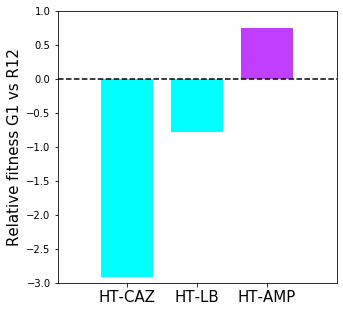

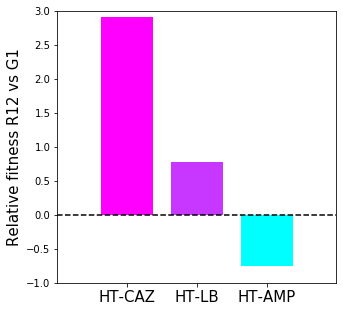

In [0]:
a_rel_fit=get_relfit_logout(rn_0,rn_a,gn_0,gn_a)
c_rel_fit=get_relfit_logout(rn_0,rn_c,gn_0,gn_c)
lb_rel_fit=get_relfit_logout(rn_0,rn_lb,gn_0,gn_lb)

names=["HT-CAZ","HT-LB","HT-AMP"]

pos=[1,2,3]
cmap =cm.get_cmap('cool')   
bin_size=.75
  

a_rel_fit=get_relfit_logout(rn_0,rn_a,gn_0,gn_a)
c_rel_fit=get_relfit_logout(rn_0,rn_c,gn_0,gn_c)
lb_rel_fit=get_relfit_logout(rn_0,rn_lb,gn_0,gn_lb)
data=[c_rel_fit,lb_rel_fit,a_rel_fit]    
fig,ax=plt.subplots(figsize=(5,5))    

for ib, b in enumerate(data):
    ax.add_patch(
        patches.Rectangle(
            (pos[ib]-bin_size/2, 0),   # (x,y)
            bin_size,          # width
            data[ib],          # height
            facecolor=cmap(data[ib])
        )
    )

ax.axhline(y=0,c='k',linestyle="dashed")
ax.set_xlim([0,4])
ax.set_ylim([-3,1])
ax.set_xticks(pos)
ax.set_xticklabels(names,fontsize=15)
ax.set_ylabel("Relative fitness G1 vs R12",fontsize=15)

###############################
a_rel_fit=get_relfit_logout(gn_0,gn_a,rn_0,rn_a)
c_rel_fit=get_relfit_logout(gn_0,gn_c,rn_0,rn_c)
lb_rel_fit=get_relfit_logout(gn_0,gn_lb,rn_0,rn_lb)
data=[c_rel_fit,lb_rel_fit,a_rel_fit]    
fig,ax=plt.subplots(figsize=(5,5))    

for ib, b in enumerate(data):
    ax.add_patch(
        patches.Rectangle(
            (pos[ib]-bin_size/2, 0),   # (x,y)
            bin_size,          # width
            data[ib],          # height
            facecolor=cmap(data[ib])
        )
    )

ax.axhline(y=0,c='k',linestyle="dashed")
ax.set_xlim([0,4])
ax.set_ylim([-1,3])
ax.set_xticks(pos)
ax.set_xticklabels(names,fontsize=15)
ax.set_ylabel("Relative fitness R12 vs G1",fontsize=15)



In [0]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

1.0